In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.__version__

'0.0.26'

In [3]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [4]:
# read in full vdj object
vdj = ddl.read_h5('dandelion_output/combined_dec_vdj.h5')

In [5]:
vdj

Dandelion class object with n_obs = 65221 and n_contigs = 132131
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_sta

In [6]:
# read in B cell object
bdata = sc.read_h5ad('h5ad/combined_dec_bcells.h5ad')
bdata

AnnData object with n_obs × n_vars = 74019 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [7]:
# subset to only D0 samples
bdata2 = bdata[bdata.obs['Collection_Day'] == 'D0'].copy()
bdata2

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


AnnData object with n_obs × n_vars = 68582 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [8]:
bdata2 = bdata2[bdata2.obs['bcr_QC_pass'] == 'True'].copy()
bdata2

AnnData object with n_obs × n_vars = 43841 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [9]:
# subset vdj data to only cells found in the B cell transcriptome data
vdj2 = ddl.Dandelion(vdj.data[vdj.data['cell_id'].isin(list(bdata2.obs_names))])
vdj2

Dandelion class object with n_obs = 43841 and n_contigs = 89171
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_star

In [10]:
ddl.tl.find_clones(vdj2)

Finding clones based on heavy chains : 100%|██████████| 466/466 [00:05<00:00, 85.97it/s] 
Refining clone assignment based on light chain pairing : 100%|██████████| 40178/40178 [02:25<00:00, 276.77it/s]


In [11]:
vdj2.write_h5('dandelion_output/combined_dec_vdj_bcells.h5', complib = 'blosc:lz4')

In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.__version__

'0.0.26'

In [3]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [11]:
# read in B cell object
bdata = sc.read_h5ad('h5ad/combined_dec_bcells.h5ad')
bdata

AnnData object with n_obs × n_vars = 74019 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [12]:
# subset to only D0 samples
bdata2 = bdata[bdata.obs['Collection_Day'] == 'D0'].copy()
bdata2

AnnData object with n_obs × n_vars = 68582 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [13]:
bdata2 = bdata2[bdata2.obs['bcr_QC_pass'] == 'True'].copy()
bdata2

AnnData object with n_obs × n_vars = 43841 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [14]:
# partition into Status_on_day_collection_summary
list(set(bdata2.obs['Status_on_day_collection_summary']))

['Moderate',
 'Non_covid',
 'Asymptomatic',
 'LPS',
 'Severe',
 'Critical',
 'Mild',
 'Healthy']

In [15]:
bdata2.obs['Status_on_day_collection_summary'].value_counts()

Moderate        11613
Mild            10648
Severe           7268
Healthy          5347
Critical         4110
LPS              2142
Asymptomatic     1734
Non_covid         979
Name: Status_on_day_collection_summary, dtype: int64

In [16]:
bdata2

AnnData object with n_obs × n_vars = 43841 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [10]:
severity_dict = dict(zip([x.split('_')[1] if '_' in x else x for x in bdata2.obs['sample_id']], bdata2.obs['Status_on_day_collection_summary']))
severity_dict

{'CV0904': 'Healthy',
 'CV0902': 'Healthy',
 'CV0025': 'Moderate',
 'CV0144': 'Severe',
 'CV0068': 'Asymptomatic',
 'CV0059': 'Asymptomatic',
 'CV0052': 'Moderate',
 'CV0074': 'Mild',
 'CV0200': 'Critical',
 'CV0176': 'Severe',
 'CV0084': 'Moderate',
 'CV0100': 'Mild',
 'CV0262': 'Asymptomatic',
 'CV0164': 'Asymptomatic',
 'CV0911': 'Healthy',
 'CV0284': 'Critical',
 'CV0120': 'Moderate',
 'CV0128': 'Mild',
 'CV0929': 'Healthy',
 'CV0178': 'Severe',
 'CV0037': 'Moderate',
 'CV0234': 'Moderate',
 'CV0326': 'Mild',
 'CV0137': 'Moderate',
 'CV0104': 'Mild',
 'CV0094': 'Moderate',
 'CV0134': 'Moderate',
 'CV0073': 'Mild',
 'CV0155': 'Asymptomatic',
 'CV0915': 'Healthy',
 'CV0201': 'Critical',
 'CV0917': 'Healthy',
 'CV0062': 'Mild',
 'CV0171': 'Asymptomatic',
 'CV0279': 'Critical',
 'CV0160': 'Mild',
 'CV0231': 'Asymptomatic',
 'CV0939': 'Healthy',
 'CV0257': 'Moderate',
 'CV0058': 'Asymptomatic',
 'CV0050': 'Mild',
 'CV0180': 'Critical',
 'CV0926': 'Healthy',
 'CV0934': 'Healthy',
 'CV094

In [11]:
# separate to the classification groups
from collections import defaultdict
sample_dict = defaultdict(list)
statuses = ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Non_covid', 'LPS']
for s in statuses:
    for k in severity_dict.keys():
        if severity_dict[k] == s:
            sample_dict[s].append(k)

In [12]:
vdj = ddl.read_h5('dandelion_output/combined_dec_vdj_bcells.h5')
vdj

Dandelion class object with n_obs = 43841 and n_contigs = 89171
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_star

In [13]:
from collections import defaultdict
vdjs = defaultdict(dict)

for s in statuses:
    vdjs[s] = ddl.Dandelion(vdj.data[vdj.data['sample_id'].isin(sample_dict[s])])

In [14]:
vdjs

defaultdict(dict,
            {'Healthy': Dandelion class object with n_obs = 5347 and n_contigs = 10910
                 data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequenc

In [15]:
%time ddl.tl.generate_network(vdjs['Healthy'])

Linking edges : 100%|██████████| 5273/5273 [00:25<00:00, 208.93it/s]


generating network layout
CPU times: user 5min 12s, sys: 2min 2s, total: 7min 14s
Wall time: 5min 18s


In [16]:
%time ddl.tl.generate_network(vdjs['Asymptomatic'])

Linking edges : 100%|██████████| 1668/1668 [00:01<00:00, 936.78it/s]


generating network layout
CPU times: user 30.1 s, sys: 608 ms, total: 30.7 s
Wall time: 32.2 s


In [17]:
%time ddl.tl.generate_network(vdjs['Mild'])

Linking edges : 100%|██████████| 10264/10264 [02:10<00:00, 78.86it/s] 


generating network layout
CPU times: user 18min 2s, sys: 3min 18s, total: 21min 21s
Wall time: 19min 21s


In [18]:
%time ddl.tl.generate_network(vdjs['Moderate'])

Linking edges : 100%|██████████| 10196/10196 [03:18<00:00, 51.26it/s]  


generating network layout
CPU times: user 25min 34s, sys: 3min 48s, total: 29min 23s
Wall time: 27min 46s


In [19]:
%time ddl.tl.generate_network(vdjs['Severe'])

Linking edges : 100%|██████████| 6607/6607 [01:01<00:00, 106.69it/s]  


generating network layout
CPU times: user 8min 45s, sys: 2min 27s, total: 11min 13s
Wall time: 9min 11s


In [20]:
%time ddl.tl.generate_network(vdjs['Critical'])

Linking edges : 100%|██████████| 3925/3925 [00:12<00:00, 305.34it/s]


generating network layout
CPU times: user 2min 31s, sys: 13.4 s, total: 2min 44s
Wall time: 2min 46s


In [21]:
%time ddl.tl.generate_network(vdjs['Non_covid'])

Linking edges : 100%|██████████| 672/672 [00:01<00:00, 580.28it/s]


generating network layout
CPU times: user 10.6 s, sys: 108 ms, total: 10.7 s
Wall time: 12.2 s


In [22]:
%time ddl.tl.generate_network(vdjs['LPS'])

Linking edges : 100%|██████████| 2098/2098 [00:03<00:00, 589.89it/s]


generating network layout
CPU times: user 45.8 s, sys: 3.64 s, total: 49.4 s
Wall time: 50.9 s


In [17]:
for v in vdjs:
    ddl.tl.clone_centrality(vdjs[v])
    ddl.tl.clone_degree(vdjs[v])
    ddl.tl.clone_size(vdjs[v])
    ddl.tl.clone_size(vdjs[v], max_size=3)
    ddl.update_metadata(vdjs[v], retrieve='mu_freq')
    vdjs[v].metadata['Age'] = pd.Series(bdata2.obs['Age'])
    vdjs[v].metadata['Sex'] = pd.Series(bdata2.obs['Sex'])
    vdjs[v].metadata['Site'] = pd.Series(bdata2.obs['Site'])
    vdjs[v].metadata['celltype_B'] = pd.Series(bdata2.obs['celltype_B'])
    vdjs[v].metadata['Collection_Day'] = pd.Series(bdata2.obs['Collection_Day'])
    vdjs[v].metadata['patient_id'] = pd.Series(bdata2.obs['patient_id'])
    vdjs[v].metadata['Status_on_day_collection_summary'] = pd.Series(bdata2.obs['Status_on_day_collection_summary'])
    vdjs[v].metadata['Worst_Clinical_Status'] = pd.Series(bdata2.obs['Worst_Clinical_Status'])
    vdjs[v].metadata['Outcome'] = pd.Series(bdata2.obs['Outcome'])

In [18]:
%time vdjs['Healthy'].write_h5('dandelion_output/combined_dec_bcell_vdj_healthy.h5', compression = 'blosc:lz4')

CPU times: user 35.9 s, sys: 1.19 s, total: 37 s
Wall time: 37.1 s


In [21]:
%time vdjs['Asymptomatic'].write_h5('dandelion_output/combined_dec_bcell_vdj_asymptomatic.h5', compression = 'blosc:lz4')

CPU times: user 2.39 s, sys: 91.1 ms, total: 2.48 s
Wall time: 2.53 s


In [22]:
%time vdjs['Mild'].write_h5('dandelion_output/combined_dec_bcell_vdj_mild.h5', compression = 'blosc:lz4')

CPU times: user 4min 22s, sys: 4.27 s, total: 4min 26s
Wall time: 4min 27s


In [23]:
%time vdjs['Moderate'].write_h5('dandelion_output/combined_dec_bcell_vdj_moderate.h5', compression = 'blosc:lz4')

CPU times: user 5min 41s, sys: 5.21 s, total: 5min 47s
Wall time: 5min 47s


In [24]:
%time vdjs['Severe'].write_h5('dandelion_output/combined_dec_bcell_vdj_severe.h5', compression = 'blosc:lz4')

CPU times: user 1min 41s, sys: 2.56 s, total: 1min 44s
Wall time: 1min 48s


In [25]:
%time vdjs['Critical'].write_h5('dandelion_output/combined_dec_bcell_vdj_critical.h5', compression = 'blosc:lz4')

CPU times: user 26.3 s, sys: 978 ms, total: 27.2 s
Wall time: 27.4 s


In [26]:
%time vdjs['Non_covid'].write_h5('dandelion_output/combined_dec_bcell_vdj_non_covid.h5', compression = 'blosc:lz4')

CPU times: user 1.38 s, sys: 90.2 ms, total: 1.47 s
Wall time: 1.54 s


In [27]:
%time vdjs['LPS'].write_h5('dandelion_output/combined_dec_bcell_vdj_lps.h5', compression = 'blosc:lz4')

CPU times: user 3.86 s, sys: 180 ms, total: 4.04 s
Wall time: 4.08 s


In [28]:
# also make a version for malignant
adata = sc.read_h5ad('h5ad/combined_dec.h5ad')
adata = adata[(adata.obs['patient_id'] == 'CV0198') & (adata.obs['celltype_B'] == 'B_malignant') ]
adata

/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


View of AnnData object with n_obs × n_vars = 2313 × 31279
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types'
    uns: 'Site_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', 'filter_bcr_colors', 'initial_clustering_B_colors', 'initial_clustering_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [29]:
vdj = ddl.read_h5('dandelion_output/combined_dec_vdj.h5')
vdj

Dandelion class object with n_obs = 65221 and n_contigs = 132131
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_sta

In [30]:
# subset vdj data to only cells found in the B cell transcriptome data
vdjm = ddl.Dandelion(vdj.data[vdj.data['cell_id'].isin(list(adata.obs_names))])
vdjm

Dandelion class object with n_obs = 2018 and n_contigs = 4035
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'c_call', 'consensus_count', 'umi_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'v_call_genotyped', 'germline_alignment_d_mask', 'sample_id', 'c_sequence_alignment', 'c_germline_alignment', 'c_sequence_start'

In [31]:
ddl.tl.find_clones(vdjm)

Finding clones based on heavy chains : 100%|██████████| 4/4 [00:00<00:00, 4004.11it/s]
Refining clone assignment based on light chain pairing : 100%|██████████| 4/4 [00:00<00:00, 83.59it/s]


In [32]:
ddl.tl.generate_network(vdjm)

Linking edges : 100%|██████████| 9/9 [02:30<00:00, 16.73s/it]


generating network layout


In [33]:
ddl.tl.clone_centrality(vdjm)
ddl.tl.clone_degree(vdjm)
ddl.tl.clone_size(vdjm)
ddl.tl.clone_size(vdjm, max_size=3)
ddl.update_metadata(vdjm, retrieve='mu_freq')

In [34]:
vdjm.metadata['Age'] = pd.Series(adata.obs['Age'])
vdjm.metadata['Sex'] = pd.Series(adata.obs['Sex'])
vdjm.metadata['Site'] = pd.Series(adata.obs['Site'])
vdjm.metadata['celltype_B'] = pd.Series(adata.obs['celltype_B'])
vdjm.metadata['Collection_Day'] = pd.Series(adata.obs['Collection_Day'])
vdjm.metadata['patient_id'] = pd.Series(adata.obs['patient_id'])
vdjm.metadata['Status_on_day_collection_summary'] = pd.Series(adata.obs['Status_on_day_collection_summary'])
vdjm.metadata['Worst_Clinical_Status'] = pd.Series(adata.obs['Worst_Clinical_Status'])
vdjm.metadata['Outcome'] = pd.Series(adata.obs['Outcome'])

In [35]:
vdjm.write_h5('dandelion_output/combined_dec_bcell_vdj_malignant.h5', compression = 'blosc:lz4')

In [36]:
sc.pp.neighbors(adata)

In [37]:
ddl.tl.transfer(adata, vdjm)

converting matrices
Updating anndata slots


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'sample_id' as categorical
... storing 'clone_id' as categorical
... storing 'isotype' as categorical
... storing 'lightchain' as categorical
... storing 'status' as categorical
... storing 'vdj_status' as categorical
... storing 'productive' as categorical
... storing 'umi_counts_light' as categorical
... storing 'v_call_heavy' as categorical
... storing 'v_call_light' as categorical
... storing 'j_call_heavy' as categorical
... storing 'j_call_light' as categorical
... storing 'c_call_heavy' as categorical
... storing 'c_call_light' as categorical
... storing 'mu_freq_light' as categorical


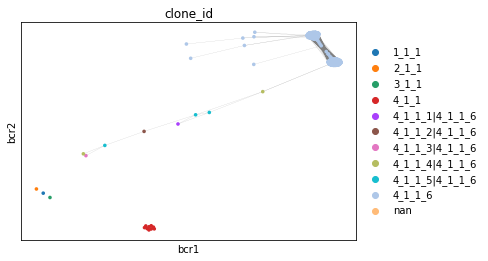

In [38]:
ddl.pl.clone_network(adata, color = 'clone_id')

In [39]:
adata.write('h5ad/combined_dec_bcell_vdj_malignant.h5ad', compression = 'gzip')